# 0. Libraries

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer

# 1. read the csv-file

In [2]:
song_2019 =pd.read_csv('SpotifyAudioFeaturesApril2019.csv')

In [3]:
song_2019.head()

artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   
2       R3HAB  6Wosx2euFPMT14UXiWudMy   
3  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820         0.743   
1                    BAND DRUM (feat. A$AP Rocky)      0.024400         0.846   
2                                   Radio Silence      0.025000         0.603   
3                                         Lactose      0.029400         0.800   
4                             Same - Original mix      0.000035         0.783   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339             0.000    1    0.0812    -7.678     1   
1       214800   0.557             0.000    8    0.2860    -7.259     1   
2       138913   0.723             0.000    9    0.0824    -5.890     0   
3       125381   0.579             0.912    5    0.0994   -12.118     0   
4       124016   0.792             0.878    7    0.0332   -10.277     1   

   speechiness    tempo  time_signature  valence  popularity  
0       0.4090  203.927               4    0.118          15  
1       0.4570  159.009               4    0.371           0  
2       0.0454  114.966               4    0.382          56  
3       0.0701  123.003               4    0.641           0  
4       0.0661  120.047               4    0.928           0

- drop three columns, because there are categorical columns and they do not need for the KMeans

In [4]:
song_2019_modified = song_2019.drop(["artist_name", "track_id", "track_name"], axis = 1)

In [5]:
song_2019_modified

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.005820         0.743       238373   0.339             0.000   
1           0.024400         0.846       214800   0.557             0.000   
2           0.025000         0.603       138913   0.723             0.000   
3           0.029400         0.800       125381   0.579             0.912   
4           0.000035         0.783       124016   0.792             0.878   
...              ...           ...          ...     ...               ...   
130658      0.006780         0.601       190539   0.801             0.000   
130659      0.918000         0.387       194583   0.249             0.000   
130660      0.330000         0.717       139191   0.532             0.000   
130661      0.007900         0.772       180013   0.510             0.000   
130662      0.549000         0.715       145827   0.734             0.000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
0         1    0.0812    -7.678     1       0.4090  203.927               4   
1         8    0.2860    -7.259     1       0.4570  159.009               4   
2         9    0.0824    -5.890     0       0.0454  114.966               4   
3         5    0.0994   -12.118     0       0.0701  123.003               4   
4         7    0.0332   -10.277     1       0.0661  120.047               4   
...     ...       ...       ...   ...          ...      ...             ...   
130658   11    0.0991    -5.174     1       0.0323  131.049               4   
130659    9    0.1030   -13.233     1       0.0437   94.039               4   
130660    8    0.0997    -8.351     0       0.2060  156.977               4   
130661    4    0.1310    -9.670     0       0.1200  120.049               4   
130662    3    0.1080    -3.244     1       0.0367  130.128               3   

        valence  popularity  
0        0.1180          15  
1        0.3710           0  
2        0.3820          56  
3        0.6410           0  
4        0.9280           0  
...         ...         ...  
130658   0.2890          57  
130659   0.3460          60  
130660   0.5460          47  
130661   0.0755          50  
130662   0.9760          55  

[130663 rows x 14 columns]

In [6]:
X = song_2019_modified

# 2. Apply the StandardScaler

In [7]:
X.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0      0.005820         0.743       238373   0.339             0.000    1   
1      0.024400         0.846       214800   0.557             0.000    8   
2      0.025000         0.603       138913   0.723             0.000    9   
3      0.029400         0.800       125381   0.579             0.912    5   
4      0.000035         0.783       124016   0.792             0.878    7   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.0812    -7.678     1       0.4090  203.927               4    0.118   
1    0.2860    -7.259     1       0.4570  159.009               4    0.371   
2    0.0824    -5.890     0       0.0454  114.966               4    0.382   
3    0.0994   -12.118     0       0.0701  123.003               4    0.641   
4    0.0332   -10.277     1       0.0661  120.047               4    0.928   

   popularity  
0          15  
1           0  
2          56  
3           0  
4           0

In [8]:
X_prep = StandardScaler().fit_transform(X)

# 3. unsupervised learning

- Defining the X

In [9]:
X_prep_df = pd.DataFrame(X_prep, columns=song_2019_modified.columns)

- Calculation the best number of clusters

Text(0, 0.5, 'inertia')

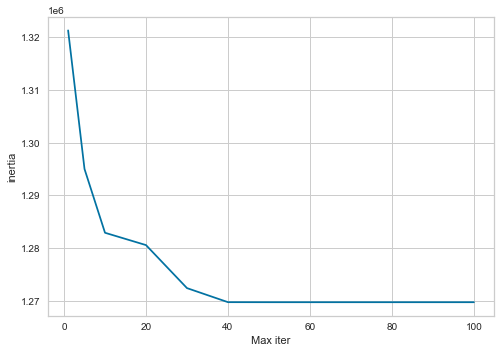

In [10]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=5,
                    random_state=1234,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(X_prep_df)

    return kmeans.inertia_

max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')

Text(0, 0.5, 'inertia')

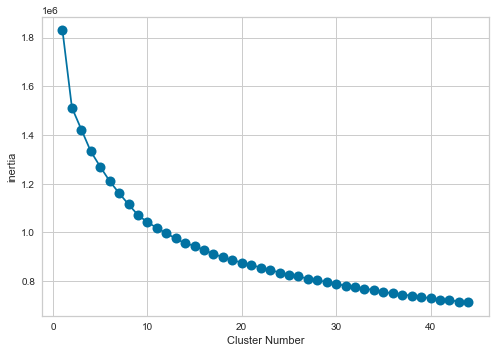

In [11]:
# I want to iterate over a range of n_clusters and for every value, I want to return the inertia
def get_kmeans_inertia_varying_cluster_n(n_clusters):
    
    # setup the model
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=1234,
                    n_init=3,
                    #algorithm='elkan',
                   )
    # train the model
    kmeans.fit(X_prep_df)
    
    # return the resulting inertia
    return kmeans.inertia_

# Plot for a range of cluster numbers
import matplotlib.pyplot as plt

cluster_range = range(1,45)

plt.plot(cluster_range,
         [get_kmeans_inertia_varying_cluster_n(c_number) for c_number in cluster_range],
         marker="o",
         ms=10,
        )
plt.xlabel('Cluster Number')
plt.ylabel('inertia')

- Apply the Kmeans with the calculate cluster number

In [12]:
kmeans = KMeans(n_clusters=30, random_state=1234)
kmeans.fit(X_prep_df)

KMeans(n_clusters=30, random_state=1234)

In [13]:
kmeans.cluster_centers_

array([[-3.69709177e-01,  7.71131961e-01, -4.04598545e-03,
         6.15084434e-01, -5.09216705e-01,  6.92606645e-01,
        -1.81471061e-01,  5.28792282e-01, -1.24471803e+00,
        -1.29728142e-01, -6.58265257e-03,  1.85377688e-01,
         1.18488681e+00, -4.97380531e-01],
       [ 1.05376024e+00, -1.70080127e-01, -1.03319102e-02,
        -8.14939436e-01, -4.20481534e-01,  1.27685181e-01,
        -3.03462151e-01, -2.08207049e-01, -1.24471803e+00,
        -3.91650394e-01, -2.73457237e-01,  5.06629526e-02,
        -4.46575333e-01,  1.30667807e-01],
       [ 1.58163453e+00, -1.22097944e+00, -2.13717168e-01,
        -1.67076925e+00, -4.68537888e-01,  5.84327257e-02,
        -5.81086398e-02, -1.65875703e+00,  2.47454101e-01,
        -4.22606733e-01, -4.84535049e-01, -3.09157236e-01,
        -5.62097499e-01, -7.71136063e-01],
       [-4.79874227e-01, -5.37177883e-01, -7.97025082e-03,
         6.55313686e-01, -5.20122643e-01, -2.26349042e-02,
        -7.86899621e-02,  5.94523807e-01,  8.

In [14]:
kmeans.inertia_

786762.2243189492

In [15]:
clusters = kmeans.predict(X_prep)
clusters

array([26, 26, 13, ..., 13, 13, 21])

In [16]:
pd.Series(clusters).value_counts().sort_index()

0     5462
1     4002
2     3603
3     5607
4     4120
5     7422
6     1053
7     6152
8     6466
9     1825
10    4909
11    2297
12    3730
13    5991
14      88
15    5432
16    5690
17    4601
18    4615
19    6687
20     966
21    6158
22    4666
23    7520
24    3896
25    1299
26    5963
27    4030
28    1197
29    5216
dtype: int64

In [17]:
X_df = pd.DataFrame(X)
X_df['cluster'] = clusters
X_df.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0      0.005820         0.743       238373   0.339             0.000    1   
1      0.024400         0.846       214800   0.557             0.000    8   
2      0.025000         0.603       138913   0.723             0.000    9   
3      0.029400         0.800       125381   0.579             0.912    5   
4      0.000035         0.783       124016   0.792             0.878    7   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.0812    -7.678     1       0.4090  203.927               4    0.118   
1    0.2860    -7.259     1       0.4570  159.009               4    0.371   
2    0.0824    -5.890     0       0.0454  114.966               4    0.382   
3    0.0994   -12.118     0       0.0701  123.003               4    0.641   
4    0.0332   -10.277     1       0.0661  120.047               4    0.928   

   popularity  cluster  
0          15       26  
1           0       26  
2          56       13  
3           0       27  
4           0       27

<AxesSubplot:ylabel='Frequency'>

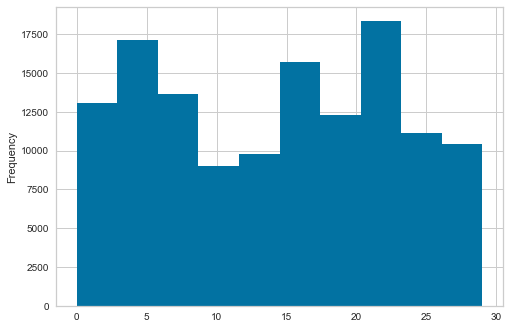

In [18]:
X_df['cluster'].plot(kind='hist')

In [19]:
y = X_df['cluster']

# 4. Visualisation

In [20]:
kmeans = KMeans(n_clusters=30,
             random_state=1234)

kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)
clusters

array([26, 26, 13, ..., 13, 13, 21])

In [21]:
len(clusters)

130663

In [22]:
X_prep.shape

(130663, 14)

In [23]:
song_2019_modified.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity',
       'cluster'],
      dtype='object')

In [24]:
song_clustered = pd.DataFrame(X_prep, columns=['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity'])

In [25]:
song_clustered['cluster_id'] = clusters

In [26]:
song_clustered['cluster_id'].value_counts()

23    7520
5     7422
19    6687
8     6466
21    6158
7     6152
13    5991
26    5963
16    5690
3     5607
0     5462
15    5432
29    5216
10    4909
22    4666
18    4615
17    4601
4     4120
27    4030
1     4002
24    3896
12    3730
2     3603
11    2297
9     1825
25    1299
28    1197
6     1053
20     966
14      88
Name: cluster_id, dtype: int64

In [27]:
kmeans.cluster_centers_

array([[-3.69709177e-01,  7.71131961e-01, -4.04598545e-03,
         6.15084434e-01, -5.09216705e-01,  6.92606645e-01,
        -1.81471061e-01,  5.28792282e-01, -1.24471803e+00,
        -1.29728142e-01, -6.58265257e-03,  1.85377688e-01,
         1.18488681e+00, -4.97380531e-01],
       [ 1.05376024e+00, -1.70080127e-01, -1.03319102e-02,
        -8.14939436e-01, -4.20481534e-01,  1.27685181e-01,
        -3.03462151e-01, -2.08207049e-01, -1.24471803e+00,
        -3.91650394e-01, -2.73457237e-01,  5.06629526e-02,
        -4.46575333e-01,  1.30667807e-01],
       [ 1.58163453e+00, -1.22097944e+00, -2.13717168e-01,
        -1.67076925e+00, -4.68537888e-01,  5.84327257e-02,
        -5.81086398e-02, -1.65875703e+00,  2.47454101e-01,
        -4.22606733e-01, -4.84535049e-01, -3.09157236e-01,
        -5.62097499e-01, -7.71136063e-01],
       [-4.79874227e-01, -5.37177883e-01, -7.97025082e-03,
         6.55313686e-01, -5.20122643e-01, -2.26349042e-02,
        -7.86899621e-02,  5.94523807e-01,  8.

In [28]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity'])

In [29]:
cluster_centers_df

acousticness  danceability  duration_ms    energy  instrumentalness  \
0      -0.369709      0.771132    -0.004046  0.615084         -0.509217   
1       1.053760     -0.170080    -0.010332 -0.814939         -0.420482   
2       1.581635     -1.220979    -0.213717 -1.670769         -0.468538   
3      -0.479874     -0.537178    -0.007970  0.655314         -0.520123   
4      -0.441429     -0.322273     0.210565  0.639112         -0.359711   
5       1.146719     -0.331627     0.064609 -0.916701         -0.519283   
6       0.214677     -0.170964    -0.358476 -0.058819         -0.133802   
7      -0.462343      0.550627    -0.066280  0.447529         -0.546958   
8      -0.605525     -0.042661     0.098251  0.393242         -0.524345   
9       1.561854     -1.448511     3.681482 -1.593791          1.231304   
10     -0.252167      0.613113    -0.193048  0.123493         -0.538364   
11     -0.274192      0.080907    -0.499410  0.533688         -0.549721   
12      1.558266     -1.408721    -0.071957 -1.597404          1.746343   
13     -0.467039      0.661013    -0.065866  0.433119         -0.550395   
14      0.327932     -0.590362    22.480514 -0.317834          0.298145   
15      1.573540     -1.552356    -0.101557 -1.717201          1.779685   
16     -0.419894      0.531745    -0.018561  0.387842         -0.535742   
17     -0.732544     -0.226819     0.221094  0.528975          1.616110   
18     -0.670342     -0.002015     0.192118  0.500738          1.623147   
19     -0.598208      0.101318     0.056595  0.368924         -0.529125   
20      1.083904     -2.051528    -0.439151 -1.468702          1.044351   
21     -0.519040      0.554346    -0.071377  0.460813         -0.542155   
22      1.370872      0.043220    -0.542105 -1.076092          1.697584   
23      0.000485      0.761980    -0.103317  0.370033         -0.575999   
24     -0.666311     -0.521765     0.048452  0.815255         -0.455759   
25      0.430017     -1.653004    -0.265215  0.538759          1.479268   
26     -0.369017      0.754863    -0.209391  0.129491         -0.549505   
27     -0.646606      0.752403    -0.460791  0.237553          1.699158   
28      0.688592      0.282024    -0.656032 -0.833285         -0.385071   
29     -0.635081      0.050357     0.063733  0.339639         -0.538363   

         key  liveness  loudness      mode  speechiness     tempo  \
0   0.692607 -0.181471  0.528792 -1.244718    -0.129728 -0.006583   
1   0.127685 -0.303462 -0.208207 -1.244718    -0.391650 -0.273457   
2   0.058433 -0.058109 -1.658757  0.247454    -0.422607 -0.484535   
3  -0.022635 -0.078690  0.594524  0.803395    -0.122693  1.663830   
4  -0.015657  3.190499  0.433885  0.083573    -0.262316  0.151260   
5  -0.124990 -0.337816 -0.100192  0.803395    -0.519886 -0.177020   
6   0.025257  0.131295  0.013893  0.097350     0.306855 -0.149333   
7   0.801597 -0.201777  0.590084  0.803395    -0.132659 -0.072972   
8   0.833080 -0.124528  0.453993  0.803395    -0.310654 -0.146927   
9  -0.114862 -0.234875 -1.730622  0.275936    -0.504661 -0.457950   
10  0.368333 -0.205801  0.213716 -1.244718     2.035266  0.188303   
11  0.149762  2.398045  0.279265  0.048170     1.859692 -0.293762   
12  0.039294 -0.390662 -1.922609 -1.244718    -0.518500 -0.606610   
13  0.673536 -0.185992  0.585819 -1.244718    -0.002021 -0.049907   
14  0.099652  0.855569 -0.894314  0.314641     1.015095 -0.694799   
15 -0.219913 -0.390209 -2.168073  0.803395    -0.516462 -0.643899   
16 -1.024858 -0.202079  0.492492 -1.244718    -0.159370 -0.251889   
17 -0.276787 -0.103093  0.119860  0.803395    -0.394040  0.313286   
18  0.401394 -0.089583  0.107032 -1.244718    -0.397753  0.224561   
19 -1.115042 -0.122160  0.428519  0.803089    -0.284634 -0.070923   
20 -0.180452  0.284395 -2.030733  0.086767    -0.579182 -1.655304   
21 -1.127636 -0.177120  0.596227  0.803062    -0.113602 -0.021097   
22 -0.099532 -0.342079 -0.934933  0.263378    -0.295531 -0.068383   
23  0.068864 -0.227321

In [31]:
cluster_centers_df['cluster_id'] = range(0,30)

In [32]:
cluster_centers_df

acousticness  danceability  duration_ms    energy  instrumentalness  \
0      -0.369709      0.771132    -0.004046  0.615084         -0.509217   
1       1.053760     -0.170080    -0.010332 -0.814939         -0.420482   
2       1.581635     -1.220979    -0.213717 -1.670769         -0.468538   
3      -0.479874     -0.537178    -0.007970  0.655314         -0.520123   
4      -0.441429     -0.322273     0.210565  0.639112         -0.359711   
5       1.146719     -0.331627     0.064609 -0.916701         -0.519283   
6       0.214677     -0.170964    -0.358476 -0.058819         -0.133802   
7      -0.462343      0.550627    -0.066280  0.447529         -0.546958   
8      -0.605525     -0.042661     0.098251  0.393242         -0.524345   
9       1.561854     -1.448511     3.681482 -1.593791          1.231304   
10     -0.252167      0.613113    -0.193048  0.123493         -0.538364   
11     -0.274192      0.080907    -0.499410  0.533688         -0.549721   
12      1.558266     -1.408721    -0.071957 -1.597404          1.746343   
13     -0.467039      0.661013    -0.065866  0.433119         -0.550395   
14      0.327932     -0.590362    22.480514 -0.317834          0.298145   
15      1.573540     -1.552356    -0.101557 -1.717201          1.779685   
16     -0.419894      0.531745    -0.018561  0.387842         -0.535742   
17     -0.732544     -0.226819     0.221094  0.528975          1.616110   
18     -0.670342     -0.002015     0.192118  0.500738          1.623147   
19     -0.598208      0.101318     0.056595  0.368924         -0.529125   
20      1.083904     -2.051528    -0.439151 -1.468702          1.044351   
21     -0.519040      0.554346    -0.071377  0.460813         -0.542155   
22      1.370872      0.043220    -0.542105 -1.076092          1.697584   
23      0.000485      0.761980    -0.103317  0.370033         -0.575999   
24     -0.666311     -0.521765     0.048452  0.815255         -0.455759   
25      0.430017     -1.653004    -0.265215  0.538759          1.479268   
26     -0.369017      0.754863    -0.209391  0.129491         -0.549505   
27     -0.646606      0.752403    -0.460791  0.237553          1.699158   
28      0.688592      0.282024    -0.656032 -0.833285         -0.385071   
29     -0.635081      0.050357     0.063733  0.339639         -0.538363   

         key  liveness  loudness      mode  speechiness     tempo  \
0   0.692607 -0.181471  0.528792 -1.244718    -0.129728 -0.006583   
1   0.127685 -0.303462 -0.208207 -1.244718    -0.391650 -0.273457   
2   0.058433 -0.058109 -1.658757  0.247454    -0.422607 -0.484535   
3  -0.022635 -0.078690  0.594524  0.803395    -0.122693  1.663830   
4  -0.015657  3.190499  0.433885  0.083573    -0.262316  0.151260   
5  -0.124990 -0.337816 -0.100192  0.803395    -0.519886 -0.177020   
6   0.025257  0.131295  0.013893  0.097350     0.306855 -0.149333   
7   0.801597 -0.201777  0.590084  0.803395    -0.132659 -0.072972   
8   0.833080 -0.124528  0.453993  0.803395    -0.310654 -0.146927   
9  -0.114862 -0.234875 -1.730622  0.275936    -0.504661 -0.457950   
10  0.368333 -0.205801  0.213716 -1.244718     2.035266  0.188303   
11  0.149762  2.398045  0.279265  0.048170     1.859692 -0.293762   
12  0.039294 -0.390662 -1.922609 -1.244718    -0.518500 -0.606610   
13  0.673536 -0.185992  0.585819 -1.244718    -0.002021 -0.049907   
14  0.099652  0.855569 -0.894314  0.314641     1.015095 -0.694799   
15 -0.219913 -0.390209 -2.168073  0.803395    -0.516462 -0.643899   
16 -1.024858 -0.202079  0.492492 -1.244718    -0.159370 -0.251889   
17 -0.276787 -0.103093  0.119860  0.803395    -0.394040  0.313286   
18  0.401394 -0.089583  0.107032 -1.244718    -0.397753  0.224561   
19 -1.115042 -0.122160  0.428519  0.803089    -0.284634 -0.070923   
20 -0.180452  0.284395 -2.030733  0.086767    -0.579182 -1.655304   
21 -1.127636 -0.177120  0.596227  0.803062    -0.113602 -0.021097   
22 -0.099532 -0.342079 -0.934933  0.263378    -0.295531 -0.068383   
23  0.068864 -0.227321

In [39]:
# this contains my cluster centers
cluster_center_sub_df = cluster_centers_df[['acousticness', 'danceability', 'instrumentalness' , 'cluster_id']]

# this cointains my datapoints with the determined
song_clustered_sub_df= song_clustered[['acousticness', 'danceability', 'instrumentalness' , 'cluster_id']]

In [40]:
cluster_center_sub_df

acousticness  danceability  instrumentalness  cluster_id
0      -0.369709      0.771132         -0.509217           0
1       1.053760     -0.170080         -0.420482           1
2       1.581635     -1.220979         -0.468538           2
3      -0.479874     -0.537178         -0.520123           3
4      -0.441429     -0.322273         -0.359711           4
5       1.146719     -0.331627         -0.519283           5
6       0.214677     -0.170964         -0.133802           6
7      -0.462343      0.550627         -0.546958           7
8      -0.605525     -0.042661         -0.524345           8
9       1.561854     -1.448511          1.231304           9
10     -0.252167      0.613113         -0.538364          10
11     -0.274192      0.080907         -0.549721          11
12      1.558266     -1.408721          1.746343          12
13     -0.467039      0.661013         -0.550395          13
14      0.327932     -0.590362          0.298145          14
15      1.573540     -1.552356          1.779685          15
16     -0.419894      0.531745         -0.535742          16
17     -0.732544     -0.226819          1.616110          17
18     -0.670342     -0.002015          1.623147          18
19     -0.598208      0.101318         -0.529125          19
20      1.083904     -2.051528          1.044351          20
21     -0.519040      0.554346         -0.542155          21
22      1.370872      0.043220          1.697584          22
23      0.000485      0.761980         -0.575999          23
24     -0.666311     -0.521765         -0.455759          24
25      0.430017     -1.653004          1.479268          25
26     -0.369017      0.754863         -0.549505          26
27     -0.646606      0.752403          1.699158          27
28      0.688592      0.282024         -0.385071          28
29     -0.635081      0.050357         -0.538363          29

In [41]:
song_clustered_sub_df

acousticness  danceability  instrumentalness  cluster_id
0          -0.974080      0.849826         -0.621709          26
1          -0.920325      1.391714         -0.621709          26
2          -0.918589      0.113279         -0.621709          13
3          -0.905859      1.149706          1.909328          27
4          -0.990817      1.060268          1.814969          27
...              ...           ...               ...         ...
130658     -0.971303      0.102757         -0.621709           7
130659      1.665030     -1.023108         -0.621709           5
130660     -0.036166      0.713039         -0.621709          13
130661     -0.968062      1.002396         -0.621709          13
130662      0.597443      0.702517         -0.621709          21

[130663 rows x 4 columns]

<AxesSubplot:xlabel='acousticness', ylabel='danceability'>

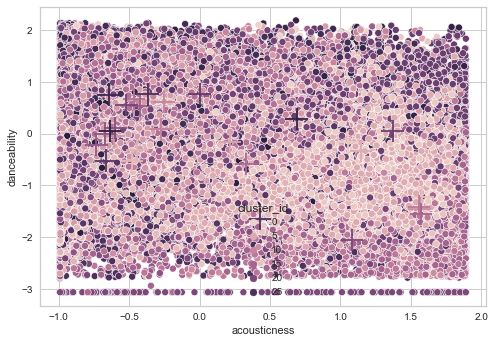

In [42]:
import seaborn as sns

sns.scatterplot(data=song_clustered_sub_df,
               x='acousticness',
               y='danceability',
               hue='cluster_id')

# plot centroids
sns.scatterplot(data=cluster_center_sub_df,
               x="acousticness",
               y="danceability",
               hue='cluster_id',
                legend=False,
                # marker=u'8',
                marker='+',
                s=500,
               )